In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import scipy.io.wavfile as wav
from quantize import quantif
from IPython.display import Audio
import math

**Etudiant :** Walid Abdelaziz KHODJA 

**Numéro étudiant :** 21214724

# TP1 : acquisition d’un signal audio.


## Préparation : 
### 1.Étude de la quantification
On a une quantification uniforme sur N bits de coefficient de pleine échelle A, ou on arrondi au plus proche quantum.

**Réponses aux questions :**
- **1)** On définit le quantum q comme la distance entre 2 valeurs consécutives de $\Omega$, avec $\Omega$ étant ensemble fini des valeurs autorisées, son expréssion est la suivante : $q = 2A/2^N $ , où A = valeur de pleine échelle et N = nombre de bits.

- **2)** On définit le bruit de quantification comme $ \epsilon = x_q − x $ donc  la différence entre la valeur réelle et la valeur quantifiée, Pour une quantification arrondissant au plus proche quantum, l'espérance du bruit de quantification est nulle, car les erreurs de quantification sont symétriques autour de zéro.
 Sa densité de probabilité est uniforme sur l'intervalle $[-\frac{q}{2}, \frac{q}{2}]$ :

$$
p(e) = \begin{cases} 
\frac{1}{q} & \text{si } -\frac{q}{2} \leq e \leq \frac{q}{2} \\
0 & \text{sinon}
\end{cases}
$$

- **3)** Le facteur de charge F est définit avec l'équation suivante: $F = A/\sigma_x$ avec A valeur de ppleine échelle et $\sigma_x$ l'écart type 

- **4)** Démontrationn de la relation exprimant le RSB de quantification en fonction de N et de F:

$RSB_q = 10 * log(\frac{\sigma_x ^2}{\sigma_q ^2}) =  10 * log(\frac{\sigma_x ^2 * 3 * 2^{2N}}{A^2})$
$      = 20 * log(2) + 10*log(\frac{\sigma_x ^2 * 3}{A^2})$
$      = 6*N - 10 * log(\frac{F^2}{3})$

### 2.Rééchantillonnage et repliement spectral
On a x(t) un signal audio (réel) temps continu de transformée de Fourier X(f), de support compact [Fmin, Fmax], et xe(t) le signal échantillonné temps continu obtenu à partir de x(t) avec une fréquence d’échantillonnage Fs

**Réponses aux questions :**
- **5)** Démonstration de Fmin = −Fmax:
On sait que x(t) est un signal réel donc selon les propriétés de la Transformé de Fourier, on a une symétrie hermitienne et Cela signifie que $X(-f) = X(f)^*$ avec $X(f)^*$ le conjugué complexe de $X(f)$. Par conséquence, le spectre d'un signal réel est symétrique par rapport à l'origine. Si le support de $X(f)$ est $[Fmin, Fmax]$, alors Fmin doit être égal à −Fmax pour maintenir cette symétrie.

- **6)** L’expression de la TFSD de xe(t), notée Xe(f) est la suivante:


$X_e(f) = TF[x_e(t)] = TF[x(t) Ш_{T_e}(t)] = X(f) * TF[ Ш_{T_e}(t)] = F_e X(f) * \Sigma_n \delta (f - nFe)$ 

$Xe(f) = Fe \Sigma_n X(f-nFe)$

On aura une périodisation de spectre du signal x(t) avec un Facteur Fe toutes les Fe comme montré ddans lla fihure suivante 

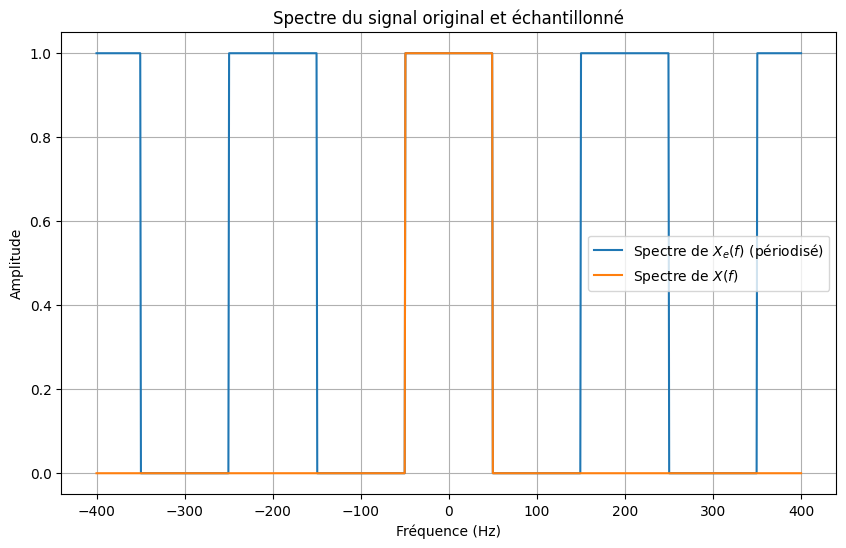

In [2]:
# Paramètres du signal
F_max = 50  # Fréquence maximale du signal
F_s = 200   # Fréquence d'échantillonnage
T_s = 1 / F_s

# Fréquences pour le spectre
f = np.linspace(-2 * F_s, 2 * F_s, 1000)

# Spectre du signal original X(f)
X_f = np.where(np.abs(f) <= F_max, 1, 0)

# Spectre du signal échantillonné X_e(f) (périodisation)
X_e_f = np.zeros_like(f)
for k in range(-2, 3):  # On montre quelques périodes
 X_e_f += np.where(np.abs(f - k * F_s) <= F_max, 1, 0)

# Tracé des spectres
plt.figure(figsize=(10, 6))

plt.plot(f, X_e_f, label='Spectre de $X_e(f)$ (périodisé)')
plt.plot(f, X_f, label='Spectre de $X(f)$')
plt.title('Spectre du signal original et échantillonné')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## En séance : 
### 1.Étude de la quantification
#### 1.1. Chargement du signal audio X depuis le fichier sine440.wav
Le fichier audio sine440.wav est un fichier au format PCM, codé sur 16 bits. Cela signifie que les valeurs du signal sont stockées sous forme d'entiers signés entre $-2^{15}$ et $2^{15} -1$ (soit entre −32768 et +32767). Pour travailler avec des valeurs normalisées entre −1 et +1, il faut diviser les échantillons par $2^{15}$

In [3]:
# Charger le fichier audio
sample_rate, x = wav.read('sine440.wav')
display(Audio("sine440.wav"))
print("Fe = " ,sample_rate, "Hz" )
print("x = ",x)

# Convertir le signal en float entre -1 et 1
N_bits = 16  # Résolution du fichier WAV
x = x / (2 ** (N_bits - 1))  # Normalisation entre -1 et 1

Fe =  44100 Hz
x =  [ 2226  2225  3321 ... -2225 -1116     0]


#### 1.2.Quantification du signal
Calcul du signal quantifié ansi que le bruit de quantification pour N=4 bits et A=1 et leurs affichages 

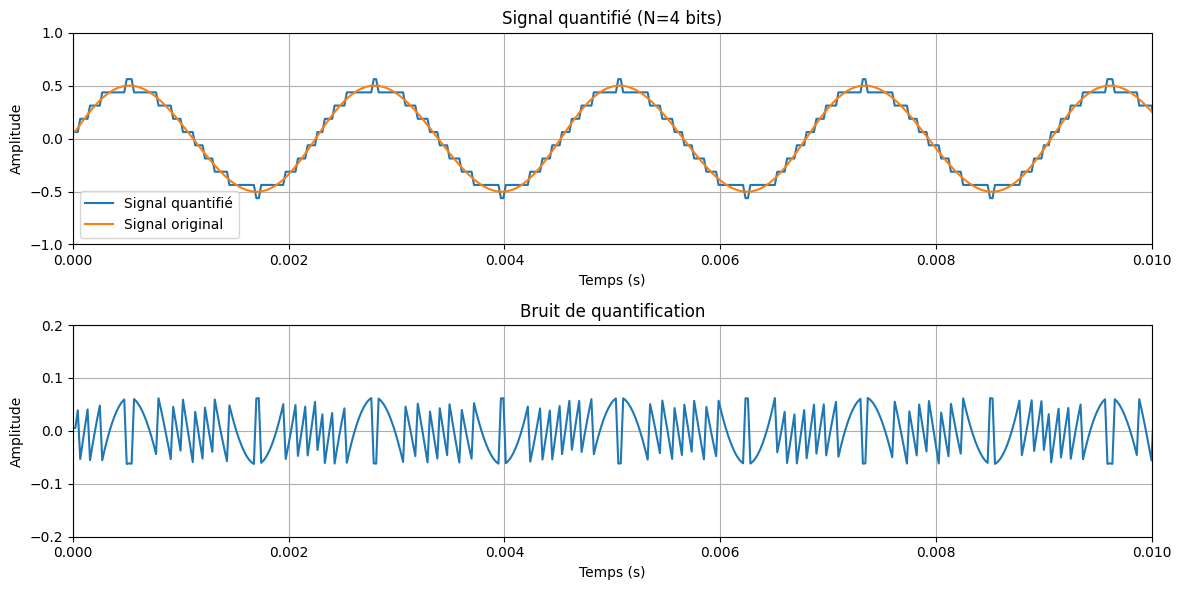

In [4]:
# Paramètres de quantification
N = 4  # Nombre de bits
A = 1  # Pleine échelle

# Quantification du signal
x_quantized, q, Q = quantif(x, A, N)

# Calcul du bruit de quantification
quantization_noise = x - x_quantized

time = np.arange(len(x)) / sample_rate  # Axe temporel

plt.figure(figsize=(12, 6))

# Signal quantifié
plt.subplot(2, 1, 1)
plt.plot(time, x_quantized, label = 'Signal quantifié')
plt.plot(time, x, label = 'Signal original')
plt.title('Signal quantifié (N=4 bits)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.axis([0, 0.01 ,-1, 1])
plt.legend()
# Bruit de quantification
plt.subplot(2, 1, 2)
plt.plot(time, quantization_noise)
plt.title('Bruit de quantification')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.axis([0, 0.01 ,-0.2,0.2])
plt.show()

**Remarque :**
- On observe que le bruit de quantification est bien centré autour de zéro, ce qui confirme l'hypothèse théorique. Cela indique que les erreurs de quantification sont symétriques par rapport à zéro, comme prévu.

- Le signal quantifié reste proche du signal original, malgré les erreurs introduites par le processus de quantification. Ces erreurs sont dues à la taille du quantum, qui est relativement grande étant donné le faible nombre de bits utilisé. Le choix de la pleine échelle A=1 est approprié, car le signal normalisé a une amplitude maximale de 1. Ainsi, le signal quantifié couvre efficacement toute la plage des valeurs du signal original.

#### 1.3.Etudier les propriétés statistiques
Etudes des propriétés statistiques du bruit de quantification (moyenne, variance, etc.) et caractérisation de sa densité de probabilité en affichant l’histogramme de ses valeurs

Moyenne du bruit de quantification (expérimentale) : -0.000028
Variance du bruit de quantification (expérimentale) : 0.001562
Variance théorique du bruit de quantification : 0.001302


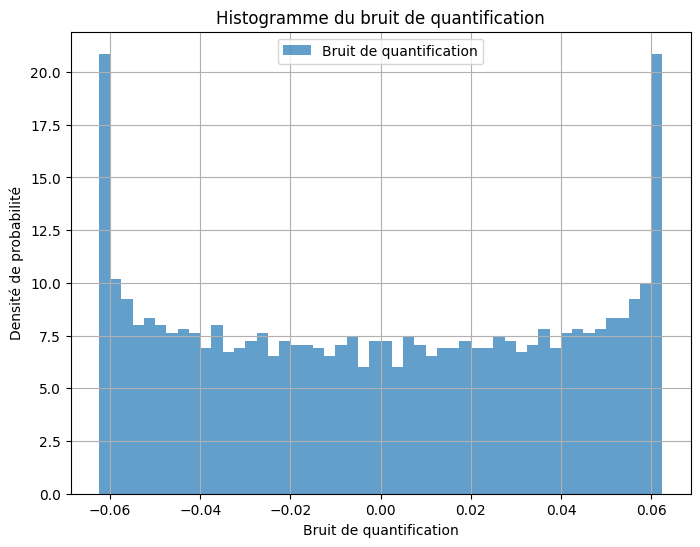

In [5]:
# Calcul de la moyenne et de la variance expérimentales
mean_noise = np.mean(quantization_noise)
variance_noise = np.var(quantization_noise)

# Calcul de la variance théorique
theoretical_variance = (q ** 2) / 12

# Affichage des résultats
print(f"Moyenne du bruit de quantification (expérimentale) : {mean_noise:.6f}")
print(f"Variance du bruit de quantification (expérimentale) : {variance_noise:.6f}")
print(f"Variance théorique du bruit de quantification : {theoretical_variance:.6f}")

# Affichage de l'histogramme du bruit de quantification
plt.figure(figsize=(8, 6))
plt.hist(quantization_noise, bins=50, density=True, alpha=0.7, label='Bruit de quantification')
plt.title('Histogramme du bruit de quantification')
plt.xlabel('Bruit de quantification')
plt.ylabel('Densité de probabilité')
plt.legend()
plt.grid()
plt.show()

**Remarque :**
- La distribution du bruit de quantification suit approximativement une loi uniforme, comme prévu dans la partie théorique. Cependant, l'histogramme présente des pics aux extrémités, ce qui s'écarte légèrement de la distribution uniforme idéale.

- Les pics observés autour de -0.06 et 0.06 sont directement liés à la nature du signal utilisé, qui est une sinusoïde pure. Ces pics sont dus aux caractéristiques spécifiques du signal sinusoïdal.

- Pendant la majeure partie de son évolution, le signal sinusoïdal se comporte presque comme une fonction affine, notamment dans les zones où l'amplitude varie entre -0.05 et 0.05. Dans ces régions, les erreurs de quantification sont réparties de manière relativement uniforme, ce qui explique pourquoi l'histogramme apparaît plus plat dans cette plage.

- En revanche, aux extrémités du signal (aux points de retournement de la sinusoïde), la variation d'amplitude devient plus faible et le signal change de direction. Étant donné que le quantum est relativement grand (en raison du faible nombre de bits utilisé), la plupart des valeurs quantifiées dans ces zones se concentrent autour des valeurs extrêmes (+A ou -A) ou de leurs valeurs adjacentes. Cela explique la présence des pics aux extrémités de l'histogramme.

- Si le signal avait été un bruit blanc (aléatoire et uniformément distribué), l'histogramme du bruit de quantification aurait été parfaitement uniforme, sans pics aux extrémités. La forme spécifique de l'histogramme observé est donc une conséquence directe de la nature périodique et régulière du signal sinusoïdal utilisé.


#### 1.4.Calcul du RSB de quantification pour différentes valeurs de N 

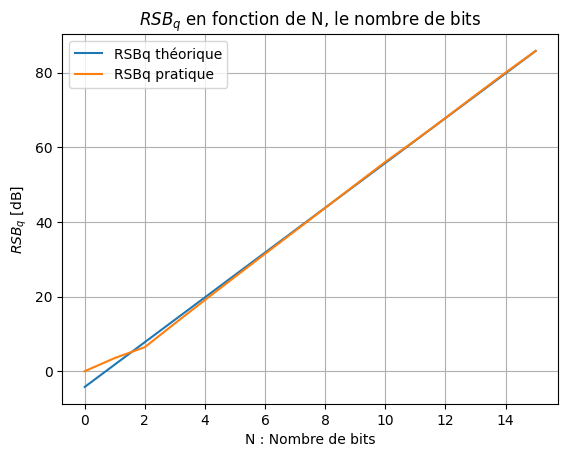

In [ ]:
# Tableau des valeurs de N (nombre de bits) à tester
N_tab = np.arange(16)

# Variance du signal 
std_X = np.std(x)  # x_n est le signal 

# Initialisation des listes pour stocker les RSB théorique et pratique
RSB_q = []  # RSB théorique
RSB_qAF = []  # RSB pratique

F = A/std_X
# Boucle sur les différentes valeurs de N
for N in N_tab:
    # Quantification du signal
    Y, q, Q = quantif(x, A, N)  # Y : signal quantifié, q : quantum, Q : valeurs quantifiées
    
    # Calcul du bruit de quantification
    bq = Y - x  # bq : bruit de quantification
    
    # Calcul du RSB théorique
    RSB_q.append(6 * N - 10 * np.log10(F**2 / 3))

    # Calcul du facteur de charge F
    F = A / std_X  # F : facteur de charge
    
    # Écart type du bruit de quantification (mesure pratique)
    std_prat = np.std(bq)

    
    # Calcul du RSB pratique
    epsilon = 1e-10 # Pour éviter la division par zéro 
    RSB_qAF.append(10 * math.log10(std_X**2 / (std_prat**2 + epsilon)))

# Tracé du RSB de quantification en fonction de N
fig = plt.figure()
plt.plot(N_tab, RSB_q, label="RSBq théorique")
plt.plot(N_tab, RSB_qAF, label="RSBq pratique")
plt.title("$RSB_q$ en fonction de N, le nombre de bits")
plt.xlabel("N : Nombre de bits")
plt.ylabel("$RSB_q$ [dB]")
plt.legend()
plt.grid()
plt.show()

**Remarques :**
- Les résultats expérimentaux confirment la validité de l'approche théorique pour le calcul du RSB de quantification. 
- La superposition des courbes théorique et pratique montre que les hypothèses et approximations utilisées dans la théorie sont appropriées pour ce type de signal. 
- Cela renforce la confiance dans l'utilisation de la formule théorique pour prédire les performances de systèmes de quantification dans des applications réelles.

#### 1.5.Représentation du signal quantifié pour N = 8 et différentes valeurs de A

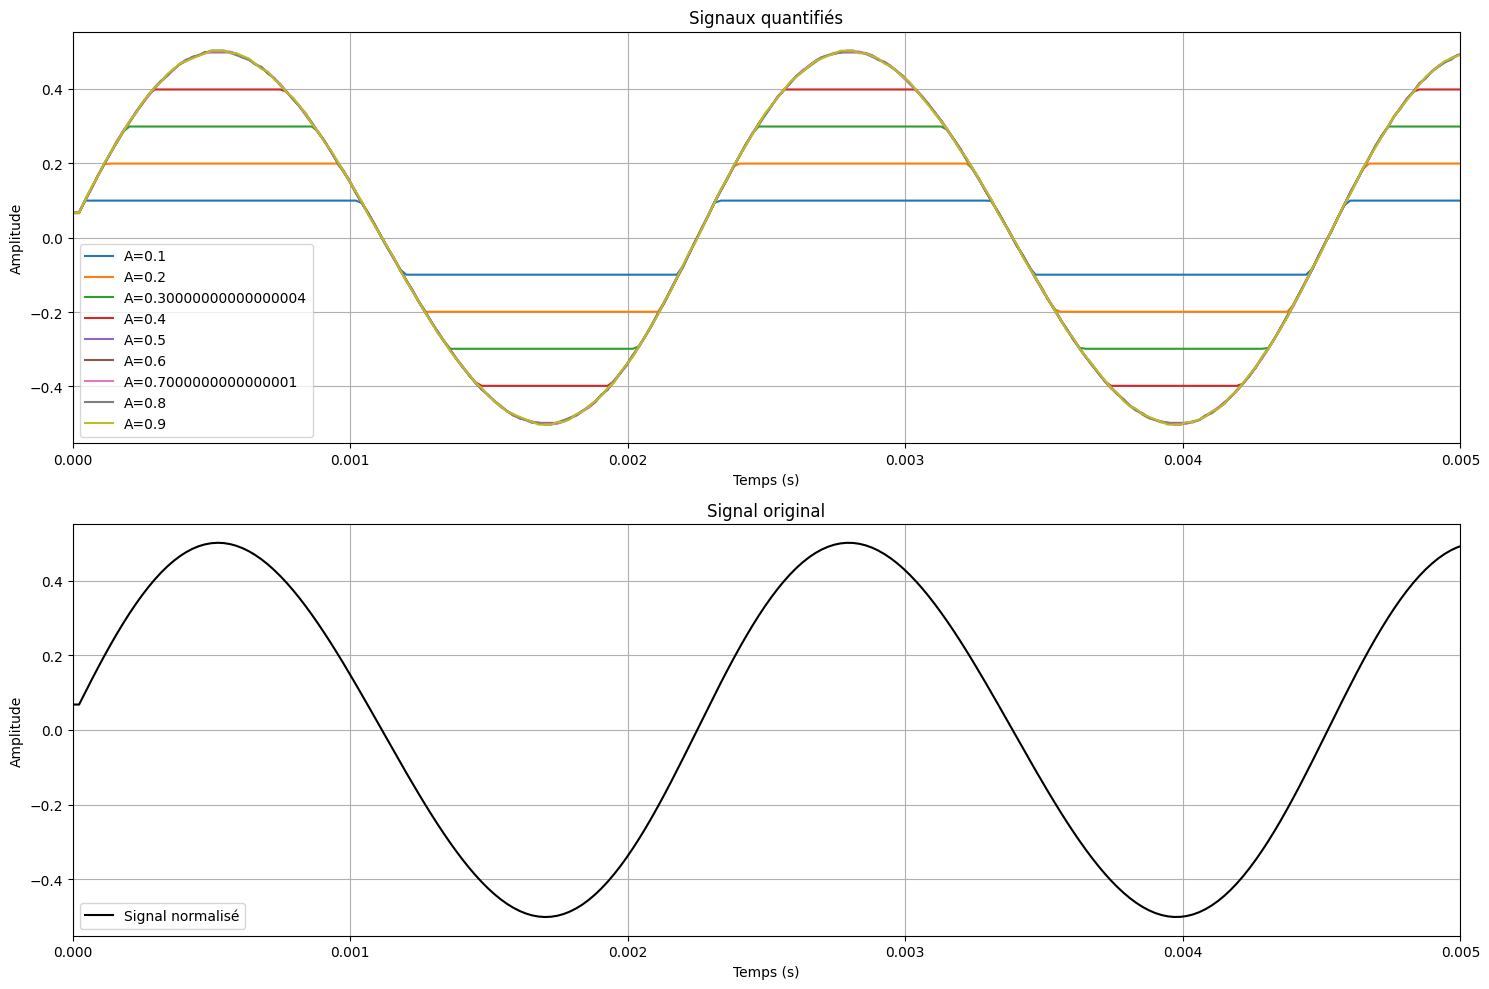

In [15]:
# Paramètres
N = 8  # Nombre de bits pour la quantification
A_tab = np.arange(0.1, stop=1, step=0.1)  # Valeurs de A à tester

# Temps correspondant aux échantillons
t = (1 / sample_rate) * np.arange(len(x))

# Création de la figure
fig = plt.figure(figsize=(15, 10))

# Tracé des signaux quantifiés pour chaque A
plt.subplot(2, 1, 1)  # Sous-graphique gauche
plt.title("Signaux quantifiés")
plt.ylabel("Amplitude")
plt.xlabel("Temps (s)")
plt.xlim([0, 0.005])  # Zoom sur les 5 premières millisecondes
plt.grid()

for A in A_tab:
    Y, q, Q = quantif(x, A, N)  # Quantification du signal
    plt.plot(t, Y, label="A=" + str(A))  # Tracé du signal quantifié
    plt.legend()

# Tracé du signal original (normalisé)
plt.subplot(2, 1, 2)  # Sous-graphique droit
plt.plot(t, x, label="Signal normalisé", color='black')  # Signal original
plt.legend()
plt.grid()
plt.title("Signal original")
plt.xlim([0, 0.005])  # Zoom sur les 5 premières millisecondes
plt.ylabel("Amplitude")
plt.xlabel("Temps (s)")

plt.tight_layout()
plt.show()

**Remarques :**
- En diminuant la valeur de la pleine échelle A, le signal quantifié est écrêté aux valeurs limites +A et −A selon la valeur maximale du signal, ce qui entraîne une perte d'information plus importante. Cela se traduit par une distorsion accrue, surtout pour les amplitudes élevées du signal original.
- L'objectif d'un quantifieur optimal est de minimiser cette distorsion en choisissant une pleine échelle A adaptée à l'amplitude du signal, afin de maximiser la précison du signal quantifié par rapport au signal original.

#### 1.6.a.Representation du RSB en fonction de A

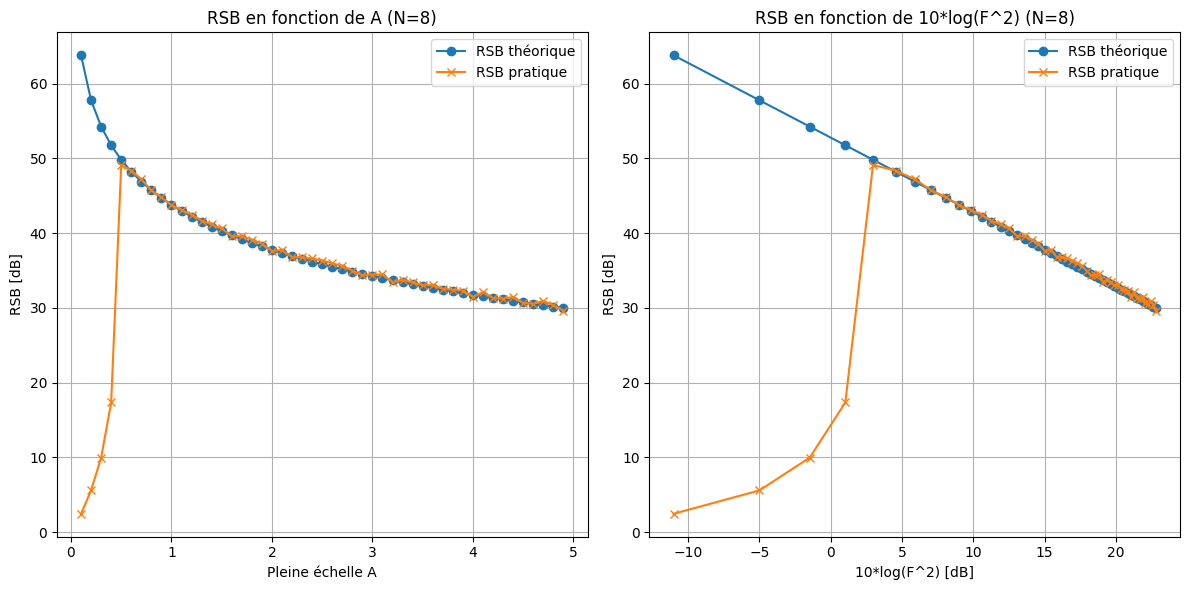

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Paramètres
N = 8  # Nombre de bits pour la quantification
A_tab = np.arange(0.1, 5,0.1)  # Valeurs de A à tester

# Variance du signal normalisé
std_X = np.std(x)  # x_n est le signal normalisé

# Initialisation des listes pour stocker les résultats
RSB_theo = []  # RSB théorique
RSB_pract = []  # RSB pratique
F_tab = []  # Facteur de charge F

# Boucle sur les valeurs de A
for A in A_tab:
    # Quantification du signal normalisé
    Y, q, Q = quantif(x, A, N)
    
    # Calcul du bruit de quantification
    bq = Y - x
    
    # Calcul du facteur de charge F
    F = A / std_X
    F_tab.append(F)
    
    # Calcul du RSB théorique
    RSB_theo.append(6 * N - 10 * np.log10(F**2 / 3))
    
    # Calcul du RSB pratique
    if np.std(bq) == 0:
        RSB_pract.append(np.inf)  # RSB infini si le bruit est nul
    else:
        RSB_pract.append(10 * math.log10(std_X**2 / np.std(bq)**2))

# Tracé du RSB en fonction de A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(A_tab, RSB_theo, label="RSB théorique", marker='o')
plt.plot(A_tab, RSB_pract, label="RSB pratique", marker='x')
plt.title("RSB en fonction de A (N=8)")
plt.xlabel("Pleine échelle A")
plt.ylabel("RSB [dB]")
plt.legend()
plt.grid()

# Tracé du RSB en fonction de 10*log(F^2)
F_dB = [20 * math.log10(F) for F in F_tab]
plt.subplot(1, 2, 2)
plt.plot(F_dB, RSB_theo, label="RSB théorique", marker='o')
plt.plot(F_dB, RSB_pract, label="RSB pratique", marker='x')
plt.title("RSB en fonction de 10*log(F^2) (N=8)")
plt.xlabel("10*log(F^2) [dB]")
plt.ylabel("RSB [dB]")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Remarques :**
- **Impact de A sur le bruit de quantification :** Pour des valeurs de A plus petites que l'amplitude du signal (ici normalisé), le bruit de quantification augmente d'autant plus que A est petit, ce qui conduit à un mauvais rapport signal sur bruit (RSB).
Cela s'explique par le fait qu'un A trop petit entraîne un écrêtage du signal, ce qui introduit une distorsion importante.

- **Superposition des courbes RSB pratique et théorique :** À partir de A=0.5, le RSB pratique se superpose au RSB théorique, ce qui confirme la validité de l'approximation théorique pour des valeurs de A adaptées à l'amplitude du signal. Cela montre que le choix de A est crucial pour obtenir un RSB optimal.

- **Effet d'un A trop grand :** Si A est très grand (par exemple, A≈1000), le signal quantifié devient limité entre −0.5 et 0.5, car le quantum q est trop grand par rapport à l'amplitude du signal. La plage entre 0.5 et A n'est pas utilisée, ce qui provoque des erreurs de quantification sous forme d'ondulations sur le RSBq. Cela entraîne une sous-utilisation de la plage de quantification et une dégradation du RSB.

- **Choix optimal de A :** Le choix de A doit être adapté à l'amplitude du signal pour minimiser la distorsion et maximiser le RSB. Une valeur de A trop petite ou trop grande entraîne une dégradation du RSB, soit par écrêtage, soit par sous-utilisation de la plage de quantification.

**Conclusion :**
- Le RSB de quantification dépend fortement du choix de A et du nombre de bits N.
- Pour obtenir un RSB optimal, il faut choisir une valeur de A qui correspond à l'amplitude maximale du signal, tout en évitant l'écrêtage et la sous-utilisation de la plage de quantification.





#### 1.6.b.Représentation du RSB en fonction de N 

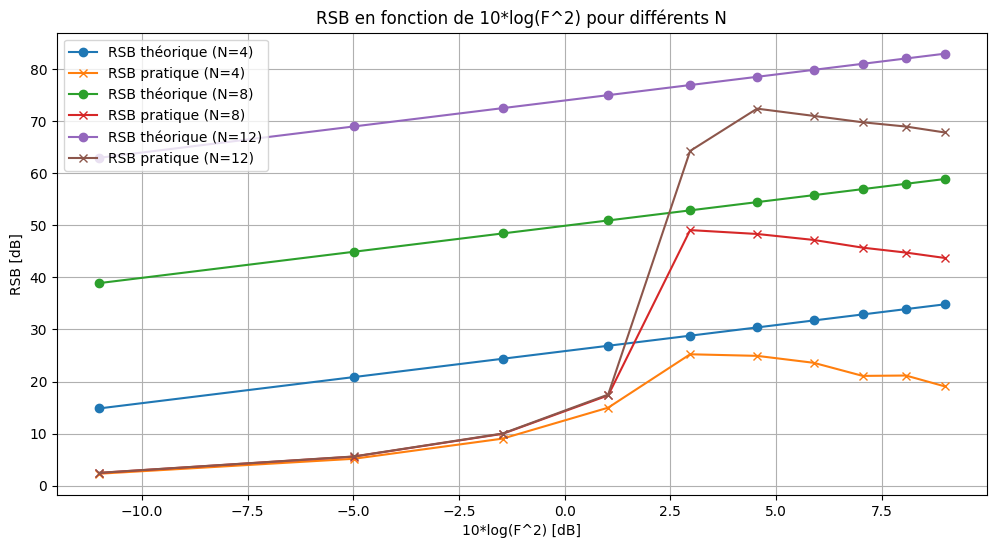

In [24]:
# Paramètres
N_values = [4, 8, 12]  # Différentes valeurs de N à tester
A_tab = np.arange(start=0.1, stop=1.1, step=0.1)  # Valeurs de A à tester

# Variance du signal normalisé
std_Xn = np.std(x)  # x_n est le signal normalisé

# Initialisation de la figure
plt.figure(figsize=(12, 6))

# Boucle sur les valeurs de N
for N in N_values:
    RSB_theo = []  # RSB théorique
    RSB_pract = []  # RSB pratique
    F_dB_tab = []  # 10*log(F^2) en dB

    # Boucle sur les valeurs de A
    for A in A_tab:
        # Quantification du signal normalisé
        Y, q, Q = quantif(x, A, N)
        
        # Calcul du bruit de quantification
        bq = Y - x
        
        # Calcul du facteur de charge F
        F = A / std_Xn
        F_dB = 20 * math.log10(F)  # 10*log(F^2) en dB
        F_dB_tab.append(F_dB)
        
        # Calcul du RSB théorique
        RSB_theo.append(6.02 * N + 1.76 + F_dB)
        
        # Calcul du RSB pratique
        if np.std(bq) == 0:
            RSB_pract.append(np.inf)  # RSB infini si le bruit est nul
        else:
            RSB_pract.append(10 * math.log10(std_Xn**2 / np.std(bq)**2))

    # Tracé du RSB en fonction de 10*log(F^2) pour chaque N
    plt.plot(F_dB_tab, RSB_theo, label=f"RSB théorique (N={N})", marker='o')
    plt.plot(F_dB_tab, RSB_pract, label=f"RSB pratique (N={N})", marker='x')

# Configuration du graphique
plt.title("RSB en fonction de 10*log(F^2) pour différents N")
plt.xlabel("10*log(F^2) [dB]")
plt.ylabel("RSB [dB]")
plt.legend()
plt.grid()
plt.show()

#### 1.6.c.Les conséquences d'une pleine échalle faible sur la variance 